In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.linalg as la

plt.rcParams.update({'font.size': 12})

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $\mathcal{N}(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $\mathcal{N}(0, 1)$
    * $x_2$ is distributed as $x_1 + \mathcal{N}(0, 3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordinates as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.


Eigenvalues:
 [ 2.64237174e+01 -1.30249752e-15  2.01429173e+00]
Eigenvectors:
 [[-0.11322048 -0.81649658  0.56613996]
 [-0.58015653 -0.40824829 -0.70480617]
 [-0.8065975   0.40824829  0.42747376]]

SVD Eigenvalues:
 [2.64264720e+01 2.01433440e+00 1.30446435e-31]
SVD Eigenvectors:
 [[-0.11321253 -0.58016643 -0.80659149]
 [-0.56614155  0.70479802 -0.42748508]
 [-0.81649658 -0.40824829  0.40824829]]

Fraction of total variabilicty by eigenvalue:
 0.929 0.000 0.071


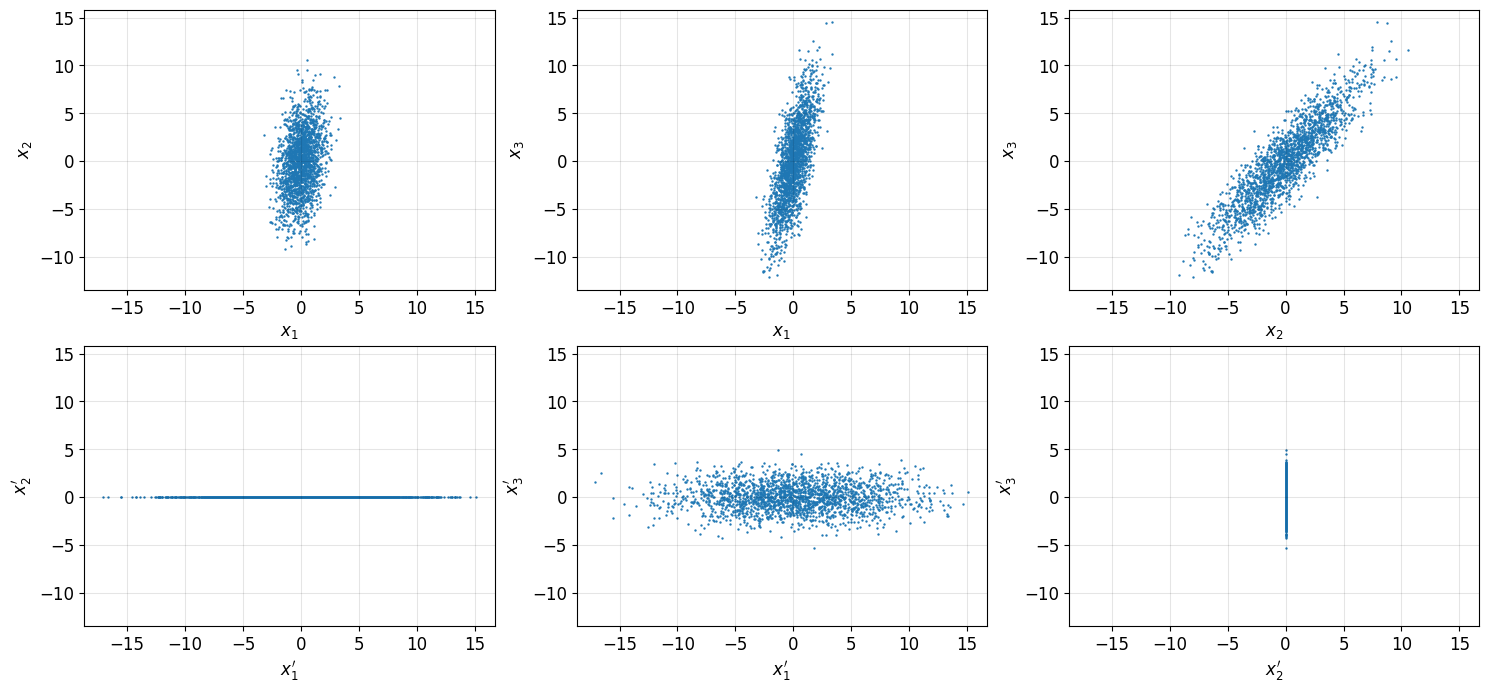

In [2]:
N = 2000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2

data = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3})

# eigendecomposition of the covariance matrix C
C = data.cov()
eigvals, eigvecs = la.eig(C)

print(f"Eigenvalues:\n {np.real_if_close(eigvals)}")
print(f"Eigenvectors:\n {eigvecs}\n")

# eigendecomposition via SVD
U, s, Vt = la.svd(data)
eigvals_svd = s**2 / (N - 1)
eigvecs_svd = Vt
print(f"SVD Eigenvalues:\n {eigvals_svd}")
print(f"SVD Eigenvectors:\n {eigvecs_svd}\n")

tot_var = np.sum(eigvals)
frac_var = np.abs(eigvals / tot_var)
print("Fraction of total variabilicty by eigenvalue:")
print(f" {frac_var[0]:.3f} {frac_var[1]:.3f} {frac_var[2]:.3f}")

# project to the eigenbase
data_proj = data @ eigvecs

fig, axs = plt.subplots(nrows=2, ncols=3, sharex='all', sharey='all', figsize=(18, 8))
for i in range(2):
    for j in range(i + 1, 3):
        col = i + j - 1
        # original data
        axs[0, col].scatter(data.iloc[:, i], data.iloc[:, j], s=0.5)
        axs[0, col].set_xlabel(rf"$x_{i + 1}$")
        axs[0, col].set_ylabel(rf"$x_{j + 1}$")
        axs[0, col].tick_params(labelleft=True, labelbottom=True)
        axs[0, col].grid(c='k', alpha=0.1)

        # projected data
        axs[1, col].scatter(data_proj.iloc[:, i], data_proj.iloc[:, j], s=0.5)
        axs[1, col].set_xlabel(rf"$x^\prime_{i + 1}$")
        axs[1, col].set_ylabel(rf"$x^\prime_{j + 1}$")
        axs[1, col].tick_params(labelleft=True, labelbottom=True)
        axs[1, col].grid(c='k', alpha=0.1)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standard deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [4]:
for i in range(4, 14):
    data["x_" + str(i)] = np.random.normal(0, 0.02, N)

C = data.cov()
eigvals, eigvecs = la.eig(C)
eigvals = np.real_if_close(eigvals)

print(f"Eigenvalues:\n {eigvals}")

trace = np.sum(eigvals)
print("\nFractions of total variability, by component:")
for i in range(13):
    print(f"{np.abs(eigvals[i] / trace):.5f}")

Eigenvalues:
 [2.64237204e+01 2.01429284e+00 1.01017962e-15 3.50688883e-04
 4.49706920e-04 4.44633625e-04 3.76723702e-04 3.78343625e-04
 3.82615240e-04 4.26241427e-04 4.06092302e-04 4.13087237e-04
 4.19693524e-04]

Fractions of total variability, by component:
0.92904
0.07082
0.00000
0.00001
0.00002
0.00002
0.00001
0.00001
0.00001
0.00001
0.00001
0.00001
0.00001


The new variables do not account for much of the total variability, and we can still reduce the dimensionality to two taking the first two components, which account for $\approx 99\%$ of the variability.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [6]:
def R(th, ph):
    R_th = np.array([[1, 0, 0],
                     [0, np.cos(th), -np.sin(th)],
                     [0, np.sin(th), np.cos(th)]])
    R_ph = np.array([[np.cos(ph), -np.sin(ph), 0],
                     [np.sin(ph), np.cos(ph), 0],
                     [0, 0, 1]])
    return R_th @ R_ph

N = 5000
# spring parameters
freq = 0.1
phase = np.pi / 4

t = np.linspace(0, 100, N) # time vector
spring = np.row_stack((np.sin(freq * t + phase),      # spring motion
                       np.random.normal(0, 0.08, N),  # random noise
                       np.random.normal(0, 0.01, N)))

n = 20
theta = np.linspace(0, np.pi, n)
np.random.shuffle(theta)
phi = np.linspace(0, 2 * np.pi, n)
np.random.shuffle(phi)

# generate rotated records
records = pd.DataFrame()
for i, camera_angle in enumerate(zip(theta, phi)):
    # rotation
    new_record = np.dot(R(*camera_angle), spring)
                             
    # add new columns
    cam_num = str(i + 1)
    records["x" + cam_num] = new_record[0]
    records["y" + cam_num] = new_record[1]
    records["z" + cam_num] = new_record[2]

records

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.326125,0.631575,0.001911,0.602487,-0.357350,-0.120658,-0.532190,-0.373007,0.287901,-0.425630,...,-0.181600,0.243787,-0.588127,-0.316105,0.645280,0.293712,0.050949,0.513526,0.038680,0.489941
1,0.409234,0.578965,0.002606,0.543193,-0.431805,-0.145484,-0.460788,-0.426820,0.328906,-0.498947,...,-0.087613,0.148792,-0.610896,-0.327638,0.678551,0.202296,0.036399,0.575050,0.031650,0.413516
2,0.356945,0.614811,0.013005,0.583235,-0.388695,-0.119689,-0.508373,-0.400151,0.294970,-0.453272,...,-0.145889,0.210579,-0.603364,-0.311737,0.659305,0.260165,0.056599,0.537234,0.025488,0.465083
3,0.415403,0.578300,0.004414,0.542022,-0.438154,-0.145752,-0.458629,-0.432521,0.331052,-0.504922,...,-0.082334,0.144125,-0.615352,-0.327994,0.683011,0.197744,0.037472,0.580669,0.029631,0.411042
4,0.383097,0.601085,0.012333,0.567396,-0.412054,-0.128419,-0.488647,-0.417085,0.309002,-0.476807,...,-0.118390,0.182768,-0.611789,-0.317061,0.671511,0.233747,0.051509,0.557512,0.024385,0.443626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.567468,-0.795443,0.000628,-0.745865,0.596812,0.205550,0.631797,0.587818,-0.458314,0.690654,...,0.117683,-0.200890,0.840688,0.455672,-0.936383,-0.275466,-0.045330,-0.795001,-0.047539,-0.566095
4996,-0.538234,-0.815057,-0.001733,-0.767826,0.571555,0.194382,0.657988,0.570705,-0.442001,0.665047,...,0.150831,-0.235121,0.834579,0.449681,-0.925361,-0.308055,-0.053163,-0.773720,-0.047500,-0.594238
4997,-0.491721,-0.845956,-0.002821,-0.802461,0.530479,0.179131,0.699360,0.541776,-0.418107,0.624254,...,0.204025,-0.289357,0.823405,0.442397,-0.907634,-0.360107,-0.062951,-0.739759,-0.050077,-0.638504
4998,-0.477145,-0.855984,-0.004929,-0.813658,0.518207,0.172690,0.712659,0.533863,-0.409277,0.611528,...,0.220488,-0.306607,0.820951,0.438672,-0.902291,-0.376397,-0.067807,-0.729229,-0.049151,-0.652847


In [7]:
C = records.cov()
eigvals, eigvecs = la.eig(C)

eigvals = np.real_if_close(eigvals)
trace = np.sum(eigvals)
frac_var = np.abs(eigvals) / trace
print(f"Fractions of total variability by component:\n {frac_var}")

projection = pd.DataFrame(np.real_if_close(records @ eigvecs))

Fractions of total variability by component:
 [9.87451229e-01 1.23605635e-02 1.88207168e-04 7.30353003e-17
 6.18959536e-17 4.88292127e-17 5.24385682e-17 4.32672238e-17
 3.65997265e-17 3.76385277e-17 3.69488566e-17 2.90809141e-17
 2.90809141e-17 3.12900944e-17 3.03917550e-17 2.80198266e-17
 2.80198266e-17 2.50237717e-17 2.50237717e-17 1.96582058e-17
 1.96582058e-17 1.80974959e-17 1.60706120e-17 1.51947981e-17
 1.48795160e-17 1.48795160e-17 1.24780633e-17 1.10182125e-17
 9.66200162e-18 9.66200162e-18 9.58988108e-18 7.91144755e-18
 7.91144755e-18 6.48512845e-18 4.99189847e-18 4.02640186e-18
 3.49910020e-18 3.77728768e-18 3.77728768e-18 2.55350934e-18
 2.36861951e-18 7.03803884e-19 7.03803884e-19 1.53076832e-18
 1.53076832e-18 6.43149630e-19 6.57015729e-19 6.57015729e-19
 4.46300081e-19 4.34198720e-19 1.15092765e-19 1.15092765e-19
 1.60920955e-19 1.60920955e-19 1.09641928e-19 6.24523887e-20
 6.24523887e-20 7.07241069e-20 7.05826880e-21 7.05826880e-21]


The first component comprises 99% of the total variability, and if we plot it we can see that we’ve in fact found the spring motion’s record amidst all the noise:

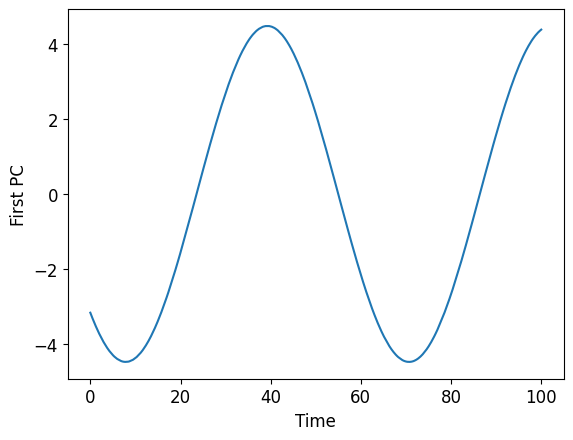

In [8]:
plt.plot(t, projection.iloc[:, 0])
plt.xlabel("Time")
plt.ylabel("First PC")
plt.show()

The other components are just noise:

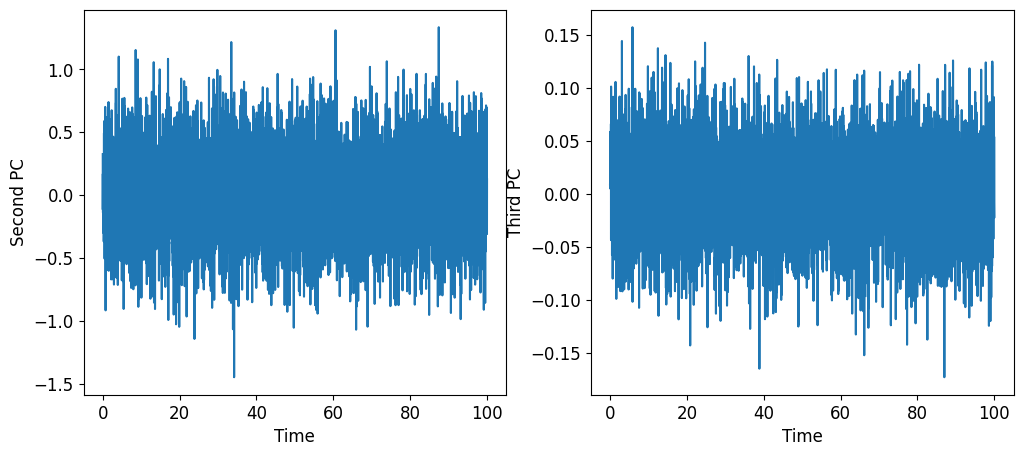

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(t, projection.iloc[:, 1])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Second PC")
ax[1].plot(t, projection.iloc[:, 2])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Third PC")
plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 